In [1]:
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import cv2

c:\Users\ammar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\ammar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\ammar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
with open('./~/training-runs/00002-styledata-auto1/network-snapshot-000800.pkl', 'rb') as f:
    G = pickle.load(f)['G_ema'].cuda()  # torch.nn.Module
z = torch.randn([1, G.z_dim]).cuda()    # latent codes
c = None                                # class labels (not used in this example)
img = G(z, c)                           # NCHW, float32, dynamic range [-1, +1]

Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


In [3]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    print(inp.size())
    inp = inp.detach().cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(8, 8))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

torch.Size([3, 256, 256])


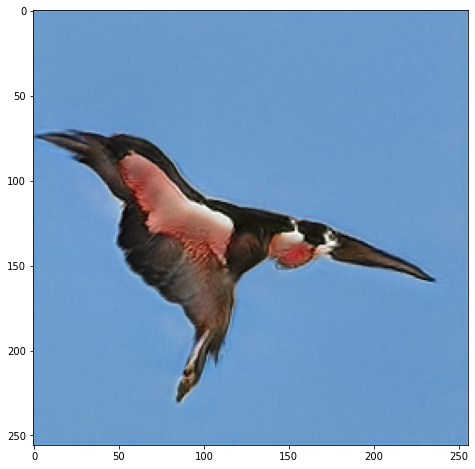

In [189]:
sitting = torch.randn([1, 512]).cuda()
img = G(sitting, c)[0]
imshow(img)
# np.save('sitting', sitting.cpu().numpy())

torch.Size([3, 256, 256])


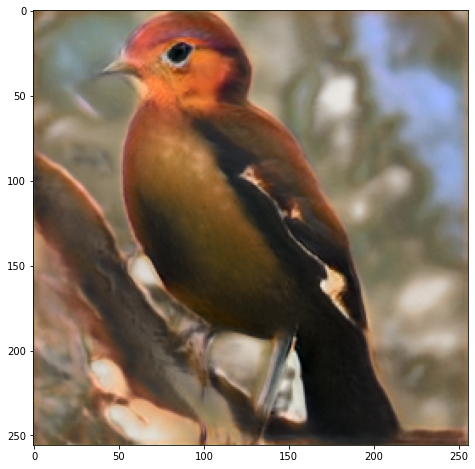

In [175]:
flying = torch.randn([1, 512]).cuda()
img = G(flying, c)[0]
imshow(img)
# np.save('flying', flying.cpu().numpy())

torch.Size([3, 256, 256])


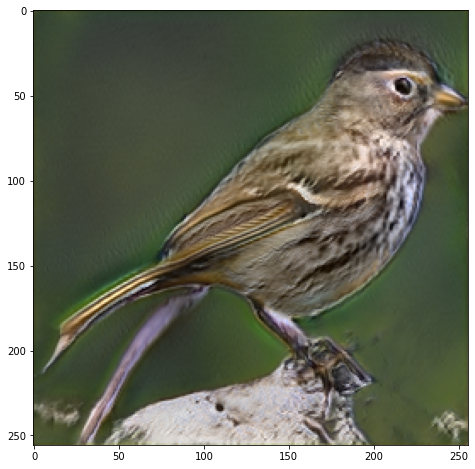

In [225]:
one = torch.randn([1, 512]).cuda()
img = G(one, c)[0]
imshow(img)

In [241]:
two = 0.9 * two + 0.5 * one

torch.Size([3, 256, 256])


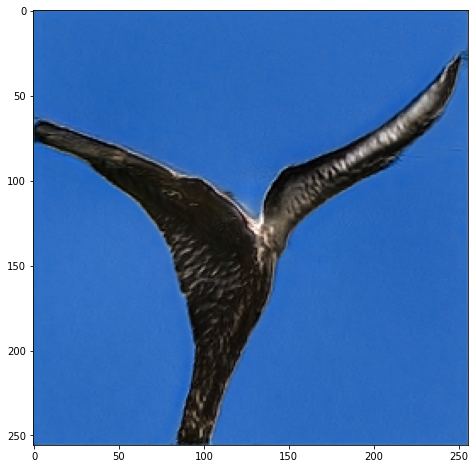

In [299]:
two = 0.9 * torch.randn([1, 512]).cuda() + 0.5 * one + 1.5 * sitting
img = G(0.9 * two + 0.5 * one, c)[0]
imshow(img)

torch.Size([3, 256, 256])


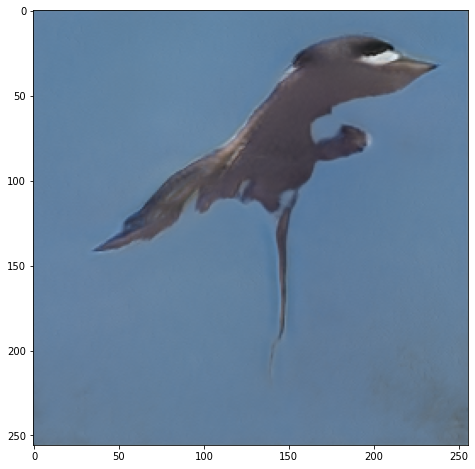

In [242]:
three = 0.5 * torch.randn([1, 512]).cuda() + 0.9 * two
img = G(three, c)[0]
imshow(img)

torch.Size([3, 256, 256])


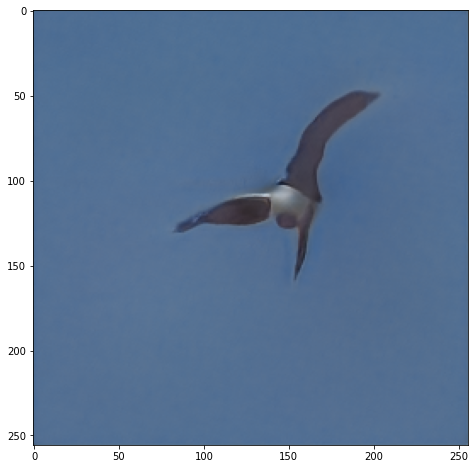

In [244]:
four = 0.5 * torch.randn([1, 512]).cuda() + 0.9 * three
img = G(four, c)[0]
imshow(img)

torch.Size([3, 256, 256])


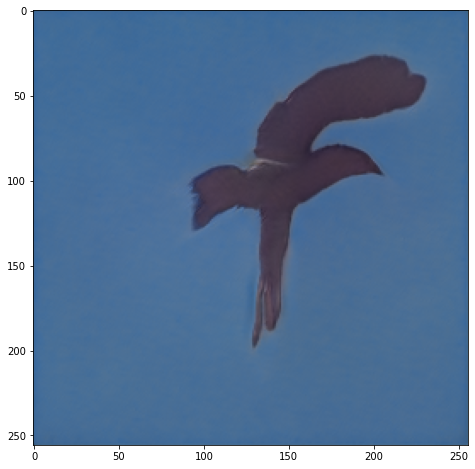

In [246]:
five = 0.5 * torch.randn([1, 512]).cuda() + 0.9 * four
img = G(five, c)[0]
imshow(img)

In [191]:
def slide(bird1, bird2, step=10):
    frames = []
    for i in range(0, step):
        frames.append((bird1 * (step - i) / step + bird2 * i / step)[0]) # 

    return frames

def multi_slide(vectors):
    assert len(vectors) >= 2

    animation = []

    for i in range(0, len(vectors) - 1):
        animation += (slide(vectors[i], vectors[i + 1]))

    return animation

In [247]:
# birds = multi_slide([sitting, flying, sitting, flying, sitting, flying, sitting, flying, sitting, flying, sitting, flying])
# birds = multi_slide([flying, sitting])
birds = multi_slide([one, two, three, four, five, five, four, three, two, one])

dataloader = torch.utils.data.DataLoader(birds, batch_size=16, shuffle=False)

In [248]:
birds[0].shape

torch.Size([512])

In [249]:
output = []

for data in dataloader:
    outs = G(data, None)

    for img in outs:
        output.append(img)

In [250]:

# imshow(torchvision.utils.make_grid(output))

import cv2

def make_animation(arr):
    frames = []
    for inp in arr:
        inp = inp.squeeze().detach().cpu().numpy().transpose((1, 2, 0))
        mean = np.array([0.5, 0.5, 0.5])
        std = np.array([0.5, 0.5, 0.5])
        inp = std * inp + mean
        inp = np.clip(inp, 0, 1)* 255
        inp = cv2.cvtColor(inp.astype(np.uint8), cv2.COLOR_BGR2RGB)
        # cv2.imwrite('test.png', inp)
        frames.append(inp)
    print(len(frames))

    out = cv2.VideoWriter('bird_animation_stages.avi',cv2.VideoWriter_fourcc(*'DIVX'), 24, (256, 256))
 
    for i in range(len(frames)):
        out.write(frames[i])
    out.release()
    
make_animation(output)

90


torch.Size([3, 256, 256])


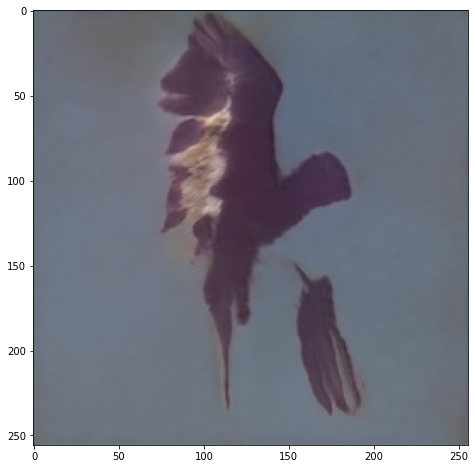

In [150]:
new_z = sitting + 5 * flying
comb = G(new_z, c)[0]
imshow(comb)